In [1]:
# ===============================================
# INCOME PREDICTION USING ADULT DATASET
# ===============================================

#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
#  Load the Dataset
data = pd.read_csv("adult.csv")

# Check first few rows
print("First 5 rows:")
print(data.head())

First 5 rows:
   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18 

In [3]:
# Basic Cleaning
# Rename columns for simplicity 
data.columns = [col.strip().replace("-", "_") for col in data.columns]

# Replace '?' with NaN
data = data.replace('?', np.nan)

# Drop missing rows
data = data.dropna()

print("\nMissing values after cleaning:")
print(data.isnull().sum().sum())


Missing values after cleaning:
0


In [4]:
# Encode Categorical Columns
# Encode target column first
le = LabelEncoder()
data['income'] = le.fit_transform(data['income'])  # <=50K → 0, >50K → 1

# Identify categorical features
cat_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical columns:", list(cat_cols))

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

print("\nData shape after encoding:", data.shape)


Categorical columns: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

Data shape after encoding: (30162, 97)


In [5]:
#  Split into Train/Test
X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 24129
Testing samples: 6033


In [6]:
#Train Logistic Regression with Scaling

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Scale the data (helps logistic regression converge faster)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression with higher iteration limit
lr = LogisticRegression(max_iter=3000, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lr = lr.predict(X_test_scaled)

print("\n--- Logistic Regression (Scaled) Results ---")
print("Accuracy:", round(accuracy_score(y_test, y_pred_lr), 4))
print(classification_report(y_test, y_pred_lr))


--- Logistic Regression (Scaled) Results ---
Accuracy: 0.842
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4533
           1       0.72      0.60      0.65      1500

    accuracy                           0.84      6033
   macro avg       0.80      0.76      0.78      6033
weighted avg       0.84      0.84      0.84      6033



In [7]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest Results ---")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print(classification_report(y_test, y_pred_rf))





--- Random Forest Results ---
Accuracy: 0.8435
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4533
           1       0.72      0.62      0.66      1500

    accuracy                           0.84      6033
   macro avg       0.80      0.77      0.78      6033
weighted avg       0.84      0.84      0.84      6033



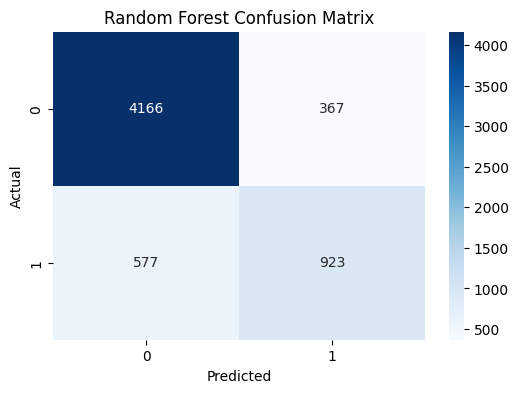

In [8]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


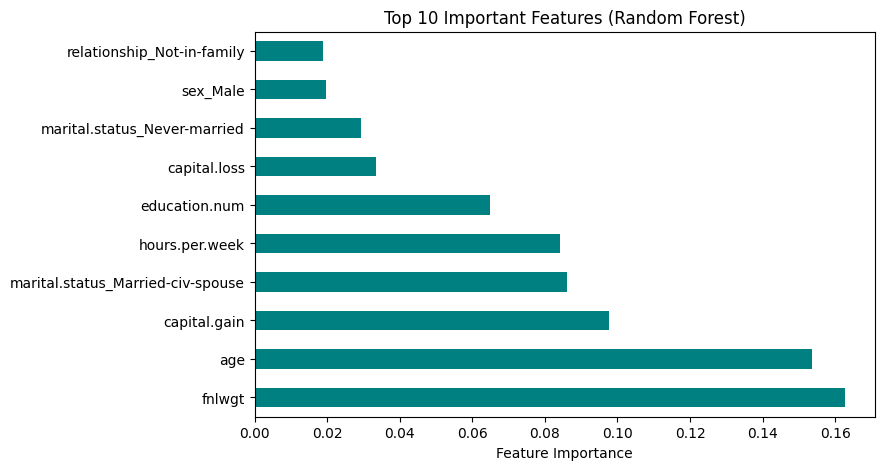

In [9]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.nlargest(10)
plt.figure(figsize=(8,5))
top_features.plot(kind='barh', color='teal')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.show()

In [10]:
#Save Model
import joblib
joblib.dump(rf, "income_model.pkl")
print("\n✅ Model saved as 'income_model.pkl'")


✅ Model saved as 'income_model.pkl'
